Imports

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data Handling and Visualization

In [11]:
df = pd.read_csv('perceptron_scattered_realistic_data.csv')
df.head()

,cgpa,resume_score,placed
0,5.85,43,0
1,5.40,36,0
2,5.95,33,0
3,6.57,46,0
4,5.34,50,0


In [12]:
df.head()

,cgpa,resume_score,placed
0,5.85,43,0
1,5.40,36,0
2,5.95,33,0
3,6.57,46,0
4,5.34,50,0


In [13]:
df.iloc[0, -2]

np.int64(43)

<Axes: xlabel='cgpa', ylabel='resume_score'>

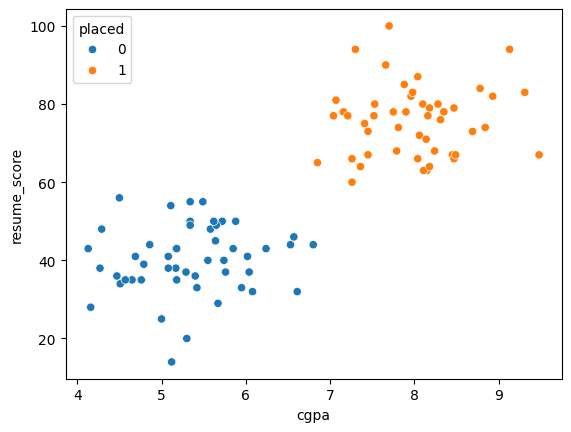

In [14]:

sns.scatterplot(data=df, x='cgpa', y='resume_score', hue='placed')

Perceptron Class

In [108]:
class Perceptron:

  def __init__(self, training_data):

    self.output_data = training_data['placed']
    self.input_data = training_data.drop('placed', axis=1)
    self.input_data['X0'] = 1

    self.weights_bias = np.random.rand(self.input_data.shape[1])   # Initializing random weights and bias

  def predict(self, input_data_point):
    return 1 if (np.dot(self.weights_bias, input_data_point) > 0) else 0


  def train(self, epochs=1000, learning_rate=0.01):

    for epoch in range(epochs):

      random_index = np.random.randint(0, self.input_data.shape[0])

      self.weights_bias = self.weights_bias + (self.output_data.iloc[random_index] - self.predict(self.input_data.iloc[random_index])) * learning_rate * self.input_data.iloc[random_index].to_numpy()

  def model_parameters(self):
    print(f"Weights and bias: {self.weights_bias}")
    return self.weights_bias

  def print_dataset(self, rows):
    print(self.input_data.head(rows))

In [109]:
fortune_teller = Perceptron(df)

Training

In [110]:
fortune_teller.train(learning_rate=1, epochs=20000)

Prediction

In [111]:
fortune_teller.predict(np.array([10, 0, 1]))

0

Learned Weights and Bias

In [112]:
fortune_teller.model_parameters()

Weights and bias: [ -935.56032833   157.38856064 -1609.62727192]


array([ -935.56032833,   157.38856064, -1609.62727192])

Plotting the Line Drawn by Perceptron

In [113]:
a, b, c = fortune_teller.model_parameters()
a, b, c

Weights and bias: [ -935.56032833   157.38856064 -1609.62727192]


(np.float64(-935.5603283271685),
 np.float64(157.38856063783126),
 np.float64(-1609.627271923358))

In [114]:
slope = -(a/b)
y_intercept = -(c/b)

x_vals = np.linspace(df['cgpa'].min(), df['cgpa'].max(), 100)
y_vals = slope * x_vals + y_intercept

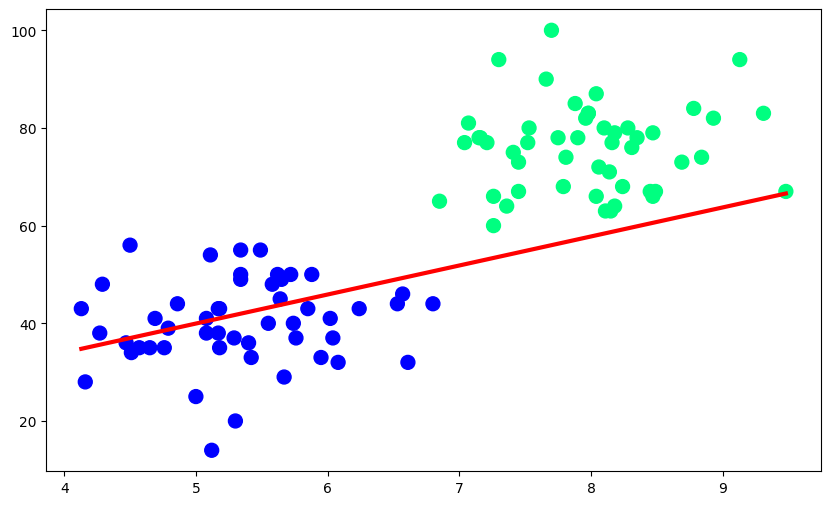

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(df['cgpa'], df['resume_score'], c=df['placed'], cmap='winter', s=100)
plt.plot(x_vals, y_vals, color='red',linewidth=3)
# plt.ylim(-3,2)

In [121]:
fortune_teller.predict(np.array([5, 40, 1]))

1

In [100]:
fortune_teller.print_dataset(5)

   cgpa  resume_score  X0
0  5.85            43   1
1  5.40            36   1
2  5.95            33   1
3  6.57            46   1
4  5.34            50   1
